# Homotopic optimal control of inverted pendulum

## Dynamics

In [ ]:
from sympy import *
init_printing()

In [ ]:
# state variables
x, v, theta, omega = symbols("x v \\theta, \\omega", real=True)
s = Matrix([x, v, theta, omega])
s.T

In [ ]:
# control parameter
u = symbols('u', real=True)

# state equations of motion
ds = Matrix([v, u, omega, sin(theta) - u*cos(theta)])
ds

In [ ]:
# homotopy parameters
alpha, beta = symbols('\\alpha \\beta', real=True, nonegative=True)

# homotopy between effort and time
L = beta + (1-beta)*abs(u)

# homotopy between energy and effort/time
L = alpha*L + (1-alpha)*u**2
L.simplify()

L = alpha + (1-alpha)*abs(u)
L = beta*L + (1-beta)*u**2
L

In [ ]:
# costate variables
l = Matrix(symbols(['\\lambda_{' + str(var) + '}' for var in s]), real=True, nonzero=True)
l.T

In [ ]:
# Hamiltonian
H = l.dot(ds) + L
H

In [ ]:
# costate equations of motion
dl = -H.diff(s)
dl

In [ ]:
# optimal control; note that alpha dissappears
# because effort and time optimality are equivalent in this case
us = solve(H.diff(u), u)[0]
us

In [ ]:
print(Matrix([
    us.subs(beta, 0),
    us.subs(beta, 1).subs(alpha, 0),
    us.subs(beta, 1).subs(alpha, 1),
    us.subs(beta, 1),
    us
]))

## Base trajectory
We first solve for a base trajectory, which will subsequently be used to iniate the forthcoming homotopy sequence approach to reaching the difficultly found bang-bang optimal control.

In [1]:
import sys, numpy as np, matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
sys.path.append('../src/')
from pendulum import Pendulum
%matplotlib inline
from scipy.integrate import simps

In [18]:
# instantiate problem
seg = Pendulum(2)

# solve arguments
s0 = [0,0,np.pi,0]
alpha = 0.9999
Tlb = 5
Tub = 15
lb = 10

In [ ]:
# solve
zg = None
#zg = [10.21795266,  0.19885557,  0.77306339,  0.99997456,  0.83067696]
#zg = [6.12032571, 0.03676911, 0.90012948, 1.40507211, 0.39248787]
#zg = [6.96209275,  0.33095384,  0.29435989, -1.11307474, -2.53239123]
#zg = [6, 0, 0, 0, 0]
while True:
    z, f, feas = seg.solve(s0, alpha, Tlb, Tub, lb, z=zg)
    if feas:
        break
z

In [14]:
# simulate the solution's resultant trajectory
tl, sl, ul = seg.propagate(z[0], s0, z[1:], alpha, atol=1e-12, rtol=1e-12, u=True)

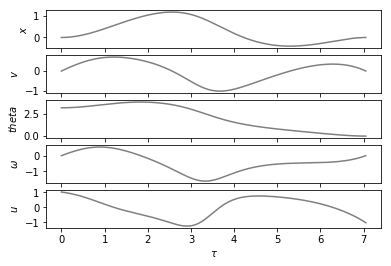

In [15]:
# plot states and control
fig, ax = seg.plot_states(tl, sl, ul)

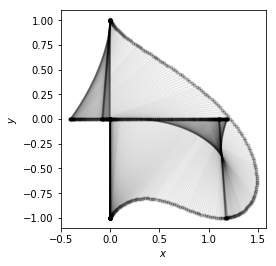

In [16]:
# plot geometric trajectory
fig, ax = seg.plot_traj(tl, sl)

In [ ]:
seg.beta = 0
T = seg.homotopy_beta(s0, 0, seg.beta, Tlb, Tub, 100, z, 1, step=0.05)

In [ ]:

T1 = seg.homotopy_beta(s0, 0, T[-1][1], Tlb, Tub, 100, T[-1][0], 0, step=0.05)

In [ ]:
# plot the forward homotopy 
fig, ax = plt.subplots(1)
fig1, ax1 = plt.subplots(1)
for i in range(len(T)):
    z = T[i][0]
    a = T[i][1]
    seg.beta = a
    tl, sl, ul = seg.propagate(z[0], s0, z[1:], 0, u=True)
    x = sl[:,0] + np.sin(sl[:,2])
    y = np.cos(sl[:,2])
    if a == 0:
        ax.plot(x, y, "k-", alpha=1, label=r"$\alpha=0$")
        ax1.plot(tl, ul, "k-", alpha=1, label=r"$\alpha=0$")
    elif a == 1:
        ax.plot(x, y, "k--", alpha=1, label=r"$\alpha=1$")
        ax1.plot(tl, ul, "k--", alpha=1, label=r"$\alpha=1$")
    else:
        ax.plot(x, y, "k-", alpha=0.1)
        ax1.plot(tl, ul, "k-", alpha=0.1)
ax.set_aspect('equal')
ax.legend()
ax1.legend()
ax.set_xlabel(r"$x + \sin\left(\theta\right)$")
ax.set_ylabel(r"$\cos\left(\theta\right)$")
ax1.set_xlabel(r'$t$')
ax1.set_ylabel(r'$u$')
plt.show()
#fig.savefig("phs.pdf", bbox_inches='tight')
#fig1.savefig("phu.pdf", bbox_inches='tight')

## Policy homotopy

```python
zo = None
a = 0
while a < 1:
    z = solve(zo, a)
    if succesfull(z):
        zo = z
        a = increase(a)
    else:
        a = decrease(a)
```

## Forward homotopy $\alpha: 0 \rightarrow 1$
This brings us to a bang-bang policy with an appropriate magnitude, which is realisable from the original quadratic policy.

In [17]:
sols = seg.homotopy(s0, 0, Tlb, Tub, 10, z, 0.9, step=0.1)
#sols = np.load("ph.npy")

z=[ 7.05190548  0.28019415  0.12356117 -1.03126349 -2.17984627]
a=0.0
z=[ 6.96479699  0.24858647  0.02921642 -1.07792256 -1.95168175]
a=0.1
z=[ 6.91210791  0.21834745 -0.02212133 -1.04247809 -1.72652577]
a=0.2
z=[ 6.86501733  0.18858008 -0.05936639 -0.98031462 -1.5024951 ]
a=0.30000000000000004
z=[ 6.71226779  0.15203036 -0.1768638  -1.04269172 -1.25422403]
a=0.4
z=[ 7.23115885  0.14186002  0.14108716 -0.3587518  -1.09168468]
a=0.5
z=[ 7.20396662  0.12759195  0.11717781 -0.34323128 -0.98296081]
a=0.55
z=[9.7565774  0.0849639  0.35280925 0.56215765 0.13654408]
a=0.65
z=[ 1.13096011e+01  1.08420404e-02  1.59324090e-02 -7.35541981e-02
  2.35687772e-01]
a=0.75
z=[10.81761353  0.02274437  0.07702613  0.04826278  0.21187962]
a=0.7875
z=[ 1.37482219e+01 -5.94849267e-03 -5.38782292e-02 -1.66332243e-01
  4.70816596e-02]
a=0.84375
z=[ 1.47678436e+01  3.66665204e-03  1.73460484e-02 -1.66701306e-03
 -1.01779118e-01]
a=0.871875
z=[ 1.39853417e+01  2.28190240e-03  2.64179259e-03 -5.02030207e-02
 -8.

KeyboardInterrupt: 

In [ ]:
sols

In [ ]:
#np.save('ph.npy', np.flip(sols, axis=0))

In [ ]:
# plot the forward homotopy 
fig, ax = plt.subplots(1)
fig1, ax1 = plt.subplots(1)
for i in range(len(sols[:-1])):
    z = sols[i][0]
    a = sols[i][1]
    seg.alpha = a
    tl, sl, ul = seg.propagate(z[0], s0, z[1:], a, u=True)
    x = sl[:,0] + np.sin(sl[:,2])
    y = np.cos(sl[:,2])
    if a == 0:
        ax.plot(x, y, "k-", alpha=1, label=r"$\alpha=0$")
        ax1.plot(tl, ul, "k-", alpha=1, label=r"$\alpha=0$")
    elif a == 1:
        ax.plot(x, y, "k--", alpha=1, label=r"$\alpha=1$")
        ax1.plot(tl, ul, "k--", alpha=1, label=r"$\alpha=1$")
    else:
        ax.plot(x, y, "k-", alpha=0.1)
        ax1.plot(tl, ul, "k-", alpha=0.1)
ax.set_aspect('equal')
ax.legend()
ax1.legend()
ax.set_xlabel(r"$x + \sin\left(\theta\right)$")
ax.set_ylabel(r"$\cos\left(\theta\right)$")
ax1.set_xlabel(r'$t$')
ax1.set_ylabel(r'$u$')
plt.show()
fig.savefig("phs.pdf", bbox_inches='tight')
fig1.savefig("phu.pdf", bbox_inches='tight')

## Random walks

```python
T = []
so = snom
zo = znom
while len(T) < N:
    s = perturb(so, ds)
    z = solve(s, zo)
    if succesfull(z):
        so = s
        zo = z
        T.append((so, zo))
        ds = increase(ds)
    else:
        ds = decrease(ds)
        
```

In [ ]:
# arguments
so = s0
zo = zg
zo = sols[0][0]
alpha = 0
n = 1
Tlb = 0
Tub = 15
lb = 5
nw = 4

# random walks
#T = seg.random_walk_par(so, zo, alpha, n, Tlb, Tub, lb, nw, dsm=0.02, verbose=True)
T = np.load('pqdb.npy')

In [ ]:
#np.save('pqdb.npy', T)

In [ ]:
# plot the random walks
fig, ax = plt.subplots(1)
fig1, ax1 = plt.subplots(1)

# for each random walk
first = False
for t in T:
    
    # initial state
    s0 = t[0]
    
    # decision vector
    z = t[1]
    
    # simulate trajectory
    tl, sll, ul = seg.propagate(z[0], s0, z[1:], alpha, u=True)
    
    # endpoints
    x = sll[:,0] + np.sin(sll[:,2])
    y = np.cos(sll[:,2])
    
    # plot
    if first:
        ax.plot(x, y, "k-", alpha=1, label="Nominal")
        ax1.plot(tl, ul, "k-", alpha=1, label="Nominal")
        first = False
    else:
        ax.plot(x, y, "k-", alpha=0.1)
        ax1.plot(tl, ul, "k-", alpha=0.1)
ax.set_aspect('equal')
#ax.legend()
#ax1.legend()
ax.set_xlabel(r'$f$')
ax.set_xlabel(r"$x + \sin\left(\theta\right)$")
ax.set_ylabel(r"$\cos\left(\theta\right)$")
ax1.set_xlabel(r'$\tau$')
ax1.set_ylabel(r'$u$')
plt.show()
#fig.savefig('pqdbs.pdf', bbox_inches='tight')
#fig1.savefig('pqdbu.pdf', bbox_inches='tight')

## Database homotopy

In [ ]:
#res = seg.homotopy_db(T, 0, 0, 15, 5, 1, step=0.1)
res = np.load('pqhdb.npy')

In [ ]:
#np.save('pqhdb.npy', res)

In [ ]:
fig, ax = plt.subplots(1)
fig1, ax1 = plt.subplots(1)

for r in res:
    
    # initial state
    s0 = r[0]
    
    # decision vector
    z = r[1]
    
    # homotopy parameter
    alpha = r[2]
    
    # simulate trajectory
    tl, sll, ul = seg.propagate(z[0], s0, z[1:], alpha, u=True)
    
    # endpoints
    x = sll[:,0] + np.sin(sll[:,2])
    y = np.cos(sll[:,2])
    
    # plot
    if alpha > 1.2:
        ax.plot(x, y, "k--", alpha=1)
        ax1.plot(tl, ul, "k--", alpha=1)
    else:
        ax.plot(x, y, "k-", alpha=0.01)
        ax1.plot(tl, ul, "k-", alpha=0.01)
ax.set_aspect('equal')
    
plt.show()    
#fig1.savefig('phdbu.pdf')

## Training a neural network

In [ ]:
from ann import *
import cloudpickle as cp
from matplotlib.ticker import FormatStrFormatter

In [ ]:
# generate the databases
#data = seg.gen_db(res, cat=True)
data = np.load('pqhanndb.npy')

In [ ]:
# save the database
#np.save('pqhanndb.npy', data)

In [ ]:
# format the data for the ann
db = Data(data, [0, 1, 2, 3, 4], [5])

In [ ]:
# instantiate the neural network
mlp = Pendulum_Controller([5, 50, 50, 50, 1])

In [ ]:
pnets = cp.load(open("../src/pendulum_nets.p", "rb"))

In [ ]:
mlp.train(db.i[:20000], db.o[:20000], epo=1000, lr=1e-3, gpu=False, ptst=0.1)

In [ ]:
%matplotlib
fig, ax = plt.subplots(1, sharex=True, sharey=False)

# line colours
colors = np.linspace(0.8, 0, 4)

# pendulum nets
'''
for i, net in enumerate(pnets):
    ax.plot(net.ltrn, color=str(colors[i]), linestyle="-", label=r'${} \times {}$'.format(net.shape[1], net.nl-2))
    ax.plot(net.ltst, color=str(colors[i]), linestyle="--")
'''    
ax.plot(mlp.ltrn, color="k", linestyle="-")
ax.plot(mlp.ltst, color="k", linestyle="--")

ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel(r'$MSE$')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
fig.tight_layout()
ax.legend(loc='best')
plt.show()

In [ ]:
mlp = pnets[np.argmin([net.ltrn[-1] for net in pnets])]
mlp

## Simulating the neural network controller

In [ ]:
fig, ax = plt.subplots(1)
fig1, ax1 = plt.subplots(1)
s0 = np.array([0, 0, np.pi, 0])
n = 10
for alpha, alphac in zip(np.linspace(0, 1, n), np.linspace(0.2, 0.8, n)):
    T = 6
    tl, sl, ul = seg.propagate_controller(T, s0, mlp.predict, alpha, atol=1e-13, rtol=1e-13)
    x = sl[:,0] + np.sin(sl[:,2])
    y = np.cos(sl[:,2])
    ax.plot(x, y, "k-", alpha=alphac)
    ax1.plot(tl, ul, "k-", alpha=alphac)
ax.set_aspect('equal')
ax.set_xlabel(r'$f$')
ax.set_xlabel(r"$x + \sin\left(\theta\right)$")
ax.set_ylabel(r"$\cos\left(\theta\right)$")
ax1.set_xlabel(r'$\tau$')
ax1.set_ylabel(r'$u$')
plt.show()

## Neural network accuracy

In [ ]:
n = 2

fig, ax = plt.subplots(n, sharex=True)
s = np.array([0, 0, np.pi, 0])
il = np.linspace(0, len(sols)-1, n, dtype=int)
for i, j in zip(il, range(n)):
    
    # simulate
    z = sols[i][0]
    alpha = sols[i][1]
    tl, sl, ul = seg.propagate(z[0], s, z[1:], alpha, u=True)
    tst = torch.tensor(np.hstack((sl[:, :seg.sdim], np.full((len(sl), 1), alpha))))
    tst = mlp(tst).detach().numpy().flatten()
    ax[j].plot(tl, ul, "k--")
    ax[j].plot(tl, tst, "k-", alpha=0.5)
    ax[j].set_title(r'$\alpha = {:.0f}$'.format(alpha))
    ax[j].set_ylabel(r'$u$')
    
ax[-1].set_xlabel(r'$\tau$')
ax[-1].legend(['Ground truth', 'Prediction'])
    
plt.tight_layout()
plt.show()
fig.savefig('punn.pdf', bbox_inches='tight')

In [ ]:
%matplotlib
# solutions
sols = np.load("ph.npy")

# number of homotopy parameters to sample
na = 2

# sample homotopy parameters
sa = np.linspace(0, 1, na)

# plot everything
fig, ax = plt.subplots(1)
for a in sa:
    
    # get homotopy solution instance
    z, alpha = sols[np.argmin(abs(sols[:,1] - a))]
    T = z[0]
    l0 = z[1:]
    
    # propagate trajectory with Pontryagin
    tl, sl, ul = seg.propagate(T, s0, l0, alpha, u=True)
    ax.plot(tl, ul, "k--")
    
    # predict controls with neural network
    tst = torch.tensor(np.hstack((sl[:, :seg.sdim], np.full((len(sl), 1), alpha))))
    tst = mlp(tst).detach().numpy().flatten()
    ax.plot(tl, tst, "k-", alpha=0.5)
    
    # propagate trajectory with neural network
    #tl, sl, ul = seg.propagate_controller(T, s0, mlp.predict, alpha, atol=1e-13, rtol=1e-13)
    #ax.plot(tl, ul, "k-", alpha=0.5)
    
plt.show()

## Policy trajectory optimality
Algorithm 1 Policy trajectory optimality
1: Given initial state xo and final time tf of trajectory from test set
2: Compute trajectory arising from policy with initial state xo and integration time tf
3: Extract final state xf from policy trajectory
4: Solve for optimal trajectory with initial state xo and final state xf
5: Evaluate objective function on policy trajectory and optimal trajectory: j
π
, j
∗
6: Compute relative error: (j
π − j
∗
)/j∗

In [ ]:
# given an initial state x0
# got it!

fig, ax = plt.subplots(1)
fig1, ax1 = plt.subplots(1)
seg.sf = np.zeros(seg.sdim)

# and final time tf
i = 0
z = sols[i][0]
tf = z[0]
alpha = sols[i][1]
beta = 1

# compute trajectory with policy with x0 and tf
tl, sl, ul = seg.propagate_controller(tf, s0, mlp.predict, alpha, atol=1e-12, rtol=1e-12)
x = sl[:,0] + np.sin(sl[:,2])
y = np.cos(sl[:,2])
ax.plot(x, y, "k-")
ax1.plot(tl, ul, "k-")
jp = seg.lagrangian(ul, alpha, beta)
jp = simps(jp, tl)

# extract final state from policy trajectory
# solve the trajectory from initial state to policy trajectory final state
seg.sf = sl[-1, :seg.sdim]
z, f, feas = seg.solve(s0, alpha, Tlb, Tub, lb=100, z=z)
tl, sl, ul = seg.propagate(z[0], s0, z[1:], alpha, atol=1e-12, rtol=1e-12, u=True)
x = sl[:,0] + np.sin(sl[:,2])
y = np.cos(sl[:,2])
ax.plot(x, y, "k--")
ax1.plot(tl, ul, "k--")
ax.set_aspect('equal')
jo = seg.lagrangian(ul, alpha, beta)
jo = simps(jo, tl)
plt.show()
alpha

In [ ]:
# number of homotopy parameters to sample
na = 11
beta = 0

# sample homotopy parameters
sa = np.linspace(0, 1, na)

# results
opt_array = np.zeros((na, len(pnets)))

# for each pendulum net
for i, net in enumerate(pnets):
    
    # for each homotopy parameter
    for j, a in enumerate(sa):

        # get decision vector and homotopy parameter
        seg.sf = np.zeros(seg.sdim)
        z, alpha = sols[np.argmin(abs(sols[:,1] - a))]
        tf = z[0]

        # compute trajectory with policy with x0 and tf
        tl, sl, ul = seg.propagate_controller(tf, s0, net.predict, alpha, atol=1e-12, rtol=1e-12)

        # compute cost of policy trajectory
        jp = seg.lagrangian(ul, alpha, beta)
        jp = simps(jp, tl)

        # compute optimal trajectory to xf from policy trajectory
        seg.sf = sl[-1, :seg.sdim]
        z, f, feas = seg.solve(s0, alpha, Tlb, Tub, lb=100, z=z)
        tl, sl, ul = seg.propagate(z[0], s0, z[1:], alpha, atol=1e-12, rtol=1e-12, u=True)

        # compute cost of optimal trajectory
        jo = seg.lagrangian(ul, alpha, beta)
        jo = simps(jo, tl)
        
        # compute relative optimality
        e = abs(jp - jo)/jo
        
        # message
        print("The optimality of net {} at alpha = {:.4f} is {:6f}".format(net.shape, alpha, e*100))
        
        # record
        opt_array[j, i] = e 

In [ ]:
import pandas as pd

In [ ]:
cols = [r'${} \times {}$'.format(net.shape[1], net.nl) for net in pnets]
rows = ['{:.1f}'.format(a) for a in sa]
df = pd.DataFrame(opt_array*100, columns=cols, index=rows)
print(df.to_latex(header="Architecture"))

In [ ]:
df.mean(axis=0)